### Your Name Here: Desiree Koh
### Your TF Name: Phil Lodine
### Graduate or Undergraduate Credit: Graduate

## LEGO Counting
My husband and I are proud parents of 5-year-old that loves Lego (the 5-year-old is really just an excuse to buy more Lego for ourselves). Other than the big box of Legos we have, we also occasionally purchase Lego sets that build a specific thing with specialty pieces. Now, to avoid Lego sorting hell, it is advisable to keep your Lego sets separate from your big box of Legos. Prior to gathering up the pieces of a Lego set and putting it in its own Ziploc bag, you can take an extra (and mostly unnecessary) step and count the pieces before putting them away. An easier way to do, other than making your 5-year-old do it, is to use Python image processing to do the work of counting for you. I’m considering trying out these three methods:

*	Method 1: Average pixels (inspired by Pset 5 Q5)
*	Method 2: Contour Finding
*	Method 3: Label Connect

It is also feasible to use this same method to count coins from a piggy bank, beads, or puzzle pieces. You may even want to count the pieces of a puzzle before starting it lest you end up spending Christmas vacation working on a puzzle to find out you are missing one and are unable to complete it—not that I know from experience.


In [3]:
# import some useful packages
import numpy as np
import sklearn
import scipy
from sklearn.cluster import KMeans
from scipy.misc import toimage
from PIL import Image
import matplotlib.pyplot as plt

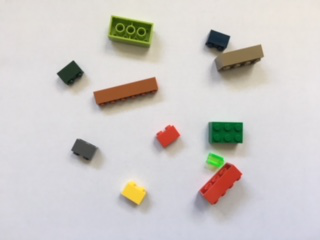

In [14]:
# import the first image
img = Image.open("lego1.jpg")
img = np.array(img)
Image.open("lego1.jpg")

# Method 1: Average pixels (inspired by Pset 5 Q5)

In [11]:
# reshape to requisite shape for fitting kmeans
X = np.reshape(img, (img.shape[0]*img.shape[1],img.shape[2]))

# clustering using k = 2, hoping to get white and any darker color
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

# finding the cluster centers
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers: ")
print(cluster_centers)

# counting up the labels for each of the clusters
labels = kmeans.labels_
labels = labels.tolist()
count0 = labels.count(0)
count1 = labels.count(1)

# printing results
print("Cluster 0 pixel count: ")
print(count0)
print("Cluster 1 pixel count: ")
print(count1)

# calculating the number of average pixels per Lego piece in this test image
print("Average pixels per piece: ")
print(count1/11)


Cluster Centers: 
[[217.89212119 215.37717562 215.93462949]
 [111.99245423  94.96004453  66.05727363]]
Cluster 0 pixel count: 
68716
Cluster 1 pixel count: 
8084
Average pixels per piece: 
734.9090909090909


### The white pixels are certainly the first cluster since the cluster center is at [217.89212119, 215.37717562, 215.93462949]. There are also a lot more pixels in the first cluster, and there is a lot more white in my image. 

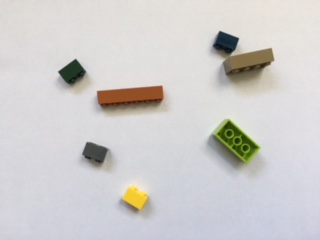

In [15]:
# import the second image
img = Image.open("lego2.jpg")
img = np.array(img)
Image.open("lego2.jpg")

In [13]:
# reshape to requisite shape for fitting kmeans
X = np.reshape(img, (img.shape[0]*img.shape[1],img.shape[2]))

# clustering using k = 2, hoping to get white and any darker color
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

# finding the cluster centers
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers: ")
print(cluster_centers)

# counting up the labels for each of the clusters
labels = kmeans.labels_
labels = labels.tolist()
count0 = labels.count(0)
count1 = labels.count(1)

# printing results
print("Cluster 0 pixel count: ")
print(count0)
print("Cluster 1 pixel count: ")
print(count1)

# calculating the number of Lego pieces using the average pixels in the previous round
print("Predicted number of pieces: ")
print(count1/735)


Cluster Centers: 
[[215.92758243 214.5530669  215.97264506]
 [101.76145311  92.36578382  63.23568361]]
Cluster 0 pixel count: 
71212
Cluster 1 pixel count: 
5588
Predicted number of pieces: 
7.602721088435374


### The result of 7.6 pieces here is pretty good. There were actually 7 pieces in the second image.

# Method 2: Contour Finding

In [ ]:
# import additional packages
from skimage import measure
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

Predicted number of pieces: 
13


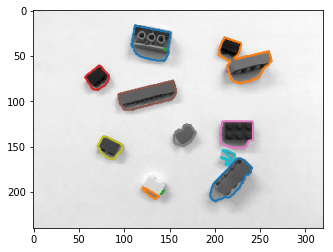

In [5]:
# load image (we need to preserve the original image for the final overlay review step)
orgimg = Image.open("lego1.jpg").convert('L')
orgimg = np.array(orgimg)

img = Image.open("lego1.jpg").convert('L')
img = np.array(img)

# find the threshold for background vs. object and then set all the background pixels as 255 (white) and the rest as 0 (black)
thresh = threshold_otsu(img) 
img[img>=thresh] = 255
img[img<thresh] = 0
img = rgb2gray(img)

# find contours
contours = measure.find_contours(img, 0.5)

#print results
print("Predicted number of pieces: ")
print(len(contours))
fig, ax = plt.subplots()
ax.imshow(orgimg, cmap=plt.cm.gray)

# draw the contour lines over the image
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

# Method 3: Label Connect

In [ ]:
# import additional packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

Predicted number of pieces: 
10


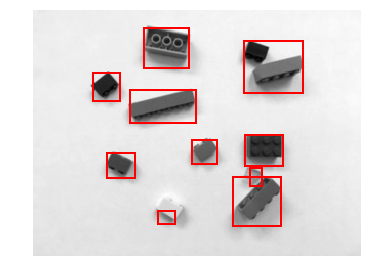

In [6]:
# load image
img = Image.open("lego1.jpg").convert('L')
img = np.array(img)

# find the threshold for background vs. object and then set all the background pixels as 255 (white) 
thresh = threshold_otsu(img)
bw = closing(img > thresh, square(3))

# Label connected regions of an integer array
label_image = label(bw, background=255)

# set the overlay image
image_label_overlay = label2rgb(label_image, image=img)
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)

# initiate and count the number of objects found
found = 0
for region in regionprops(label_image):
    # take regions with large enough areas, but not too large
    if region.area >= 20 and region.area < 10000:
        found += 1
        # draw rectangle around identified lego pieces
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

#print results
print("Predicted number of pieces: ")
print(found)

ax.set_axis_off()
plt.tight_layout()
plt.show()

# Summary and Further Exploration

* Method 1: Average pixels (Actual 7, Predicted 7.6)--A major limitation of this model is that the absolute size of the Lego piece in the image matters for accuracy. I mostly stuck to photographing Lego pieces on a 8.5"x11" piece of paper so this method was ok. Also, if you have mostly small or mostly large pieces, then using the average pixel count to guess the number of pieces will not work. 
* Method 2: Contour Finding (Actual 11, Predicted 13)--This method worked quite nicely although I wasn't able to find a way to set a minimum size so there was a bit of noise picked up. Because I needed to use a grayscale image, the light yellow piece didn't show up (though its shadow showed up twice). Two pieces that were a little close to each other were also counted as one piece. This looks like a very promising solution to the problem, especially if I can find a way to use colored pictures instead of greyscale. 
* Method 3: Label Connect (Actual 11, Predicted 10)--This method performed similarly to the Contour Finding method, although I was able to get to a better result by being about to set minimum and maximum sizes for the pieces. It had the same problem as the Contour Finding method where if also counted two pieces that were close to each other as one.

#### I would have liked to try out some trained models to see how they compared to the results I got here, but due to time limitations, I was not able to do that. (It would be a fun Summer vacation project for my son to count lego pieces in 50 or so training images.) 

#### In the process of researching this topic, I also found an app that counts things called CountThings (https://countthings.com/). It comes with a few templates built in (for things like logs, screws, and cattle), but there are more available as in-app purchases. My guess is that they are using template matching in the background for their templates. 